### DATA CURATION

In [1]:
#All imports used
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
train_df = pd.read_csv('../Datasets/application_train.csv')
train_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train_df['CLIENT_AGE'] = train_df['DAYS_BIRTH'] / -365

train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365243

train_df.drop(columns=['DAYS_EMPLOYED','DAYS_BIRTH'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,0.001744
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,0.003253
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.000616
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,0.008320
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,0.008318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25.553425,0.000646
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,56.917808,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41.002740,0.021687
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32.769863,0.013104


In [5]:
train_df.shape

(307511, 124)

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 


missing = missing_data(train_df)

In [7]:
missing[missing["Percent"]<50]

,Total,Percent
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
...,...,...
AMT_INCOME_TOTAL,0,0.000000
CNT_CHILDREN,0,0.000000
FLAG_OWN_REALTY,0,0.000000
ORGANIZATION_TYPE,0,0.000000


In [8]:
missing[missing["Percent"]<0.5]
train_df = train_df[missing[missing["Percent"]<5].index]

In [9]:
for i in train_df.select_dtypes(include = 'float64').columns:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

In [10]:
for i in train_df.select_dtypes(include = 'int64').columns:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

In [11]:
objects = train_df.select_dtypes(include=['object'])
objects.head(5)

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,Unaccompanied,N,Cash loans,WEDNESDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Business Entity Type 3
1,Family,N,Cash loans,MONDAY,F,House / apartment,Married,Higher education,State servant,N,School
2,Unaccompanied,Y,Revolving loans,MONDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Government
3,Unaccompanied,N,Cash loans,WEDNESDAY,F,House / apartment,Civil marriage,Secondary / secondary special,Working,Y,Business Entity Type 3
4,Unaccompanied,N,Cash loans,THURSDAY,M,House / apartment,Single / not married,Secondary / secondary special,Working,Y,Religion


In [12]:
from sklearn.preprocessing import OrdinalEncoder

for i in objects.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    objects[i].fillna(objects[i].mode()[0], inplace=True)
    objects[i]= enc.fit_transform(objects[[i]])

In [13]:
objects.head(5)

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,6.0,0.0,0.0,6.0,1.0,1.0,3.0,4.0,7.0,1.0,5.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,39.0
2,6.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,7.0,1.0,11.0
3,6.0,0.0,0.0,6.0,0.0,1.0,0.0,4.0,7.0,1.0,5.0
4,6.0,0.0,0.0,4.0,1.0,1.0,3.0,4.0,7.0,1.0,37.0


In [14]:
objects = objects.astype('int64')
objects.head(5)

,NAME_TYPE_SUITE,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,6,0,0,6,1,1,3,4,7,1,5
1,1,0,0,1,0,1,1,1,4,0,39
2,6,1,1,1,1,1,3,4,7,1,11
3,6,0,0,6,0,1,0,4,7,1,5
4,6,0,0,4,1,1,3,4,7,1,37


In [15]:
train_df = train_df.select_dtypes(exclude=['object'])
train_df.head(5)

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,1,1,-2120,-3648.0,-9461,0.018801,406597.5,202500.0,0,100002
1,0.0,1.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,1,1,-291,-1186.0,-16765,0.003541,1293502.5,270000.0,0,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,1,1,-2531,-4260.0,-19046,0.010032,135000.0,67500.0,0,100004
3,0.0,2.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,1,1,-2437,-9833.0,-19005,0.008019,312682.5,135000.0,0,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,1,1,-3458,-4311.0,-19932,0.028663,513000.0,121500.0,0,100007


In [16]:
# shift column 'TARGET' to first position
first_column = train_df.pop('TARGET')
train_df.insert(0, 'TARGET', first_column)

In [17]:
train_df = train_df.join(objects)
train_df.head(5)

,TARGET,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,CODE_GENDER,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,ORGANIZATION_TYPE
0,1,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,0,0,6,1,1,3,4,7,1,5
1,0,0.0,1.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,0,0,1,0,1,1,1,4,0,39
2,0,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,1,1,1,1,1,3,4,7,1,11
3,0,0.0,2.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,0,0,6,0,1,0,4,7,1,5
4,0,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,0,0,4,1,1,3,4,7,1,37


In [18]:
X = train_df.iloc[:, 1:122]
y = train_df['TARGET']

print(X.shape)
print(y.shape)

(307511, 64)
(307511,)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   DEF_30_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 2   OBS_30_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 3   OBS_60_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     307511 non-null  float64
 5   EXT_SOURCE_2                 307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   CNT_FAM_MEMBERS              307511 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 10  FLAG_DOCUMENT_6              307511 non-null  int64  
 11  CLIENT_AGE                   307511 non-null  float64
 12  FLAG_DOCUMENT_21             307511 non-null  int64  
 13 

### RANDOM FOREST MODEL

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [21]:
train_df.fillna(0, inplace=True)
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [23]:
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1)
sel = SelectFromModel(model)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1))

In [24]:
train_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [25]:
for i in train_df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    train_df[i]= enc.fit_transform(train_df[[i]])

In [26]:
for i in train_df.select_dtypes(include='object').columns:
    print(i)

In [27]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

19

In [28]:
print(selected_feat)

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'CLIENT_AGE', 'HOUR_APPR_PROCESS_START',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'NAME_FAMILY_STATUS',
       'ORGANIZATION_TYPE'],
      dtype='object')


<AxesSubplot:>

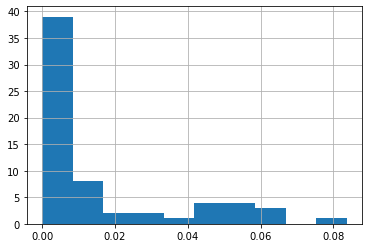

In [29]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [30]:
y = train_df["TARGET"]
X = train_df[selected_feat[:].values]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [33]:
model.score(X_test,y_test)

0.9217436547810676

In [34]:
y_RF_predicted = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [36]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')

Precision score: 0.8
Recall score: 0.002
Accuracy score: 0.922
F1 score: 0.003


In [37]:
#from sklearn.model_selection import cross_validate
#import numpy as np

#cv_results = cross_validate(model, X, y, cv=4, scoring='neg_mean_squared_error', return_train_score=True)
#cv_results

## Model with over sampling

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
oversample = SMOTE()

In [40]:
X,y=oversample.fit_resample(X,y)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [43]:
model.score(X_test,y_test)

0.943241211585231

In [44]:
y_RF_predicted = model.predict(X_test)

<AxesSubplot:>

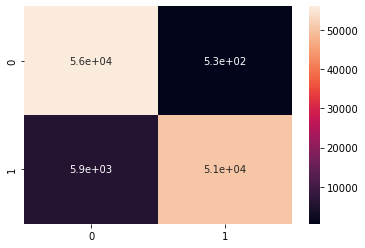

In [45]:
cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [46]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_RF_predicted), 3)}')

Precision score: 0.99
Recall score: 0.896
Accuracy score: 0.943
F1 score: 0.94
ROC AUC score: 0.943


## Model with under sampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
undersampler = RandomUnderSampler()

In [28]:
y = train_df["TARGET"]
X = train_df.drop(columns="TARGET")
X,y=undersampler.fit_resample(X,y)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [31]:
model.score(X_test,y_test)

0.6401812688821752

In [32]:
y_RF_predicted = model.predict(X_test)

<AxesSubplot:>

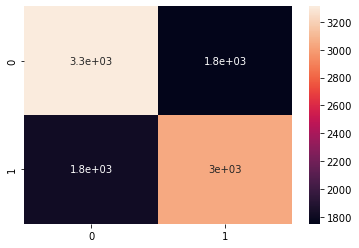

In [33]:
cf_matrix = confusion_matrix(y_test, y_RF_predicted)
sns.heatmap(cf_matrix, annot=True)

In [34]:
print(f'Precision score: {round(precision_score(y_test, y_RF_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_RF_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_RF_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_RF_predicted), 3)}')
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_RF_predicted), 3)}')

Precision score: 0.635
Recall score: 0.626
Accuracy score: 0.64
F1 score: 0.63
ROC AUC score: 0.64


In [ ]:
train_df = pd.read_csv('../Datasets/application_train.csv')

train_df['CLIENT_AGE'] = train_df['DAYS_BIRTH'] / -365

train_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED'] / -365243

In [ ]:
train_df[selected_feat[:].values]

In [ ]:
selected_feat[:].values

In [ ]:
k = missing_data(train_df[selected_feat[:].values])

In [ ]:
k

In [ ]:
sel.estimator_.feature_importances_.ravel()

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_df[selected_feat[:].values], sel.estimator_.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

In [ ]:
importances.sort_values( 'Gini-importance',ascending=False)

In [ ]:
train_df.mode()